# Movie Rating Prediction


**Import Libraries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
df = pd.read_csv('/content/sample_data/IMDb Movies India.csv', encoding='latin-1')

**Display the first few rows of the dataset**

In [29]:
print(df.head())
print(df.isnull().sum())
print(df.describe())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

**Drop rows with missing values**

In [30]:
df = df.dropna()

**Convert categorical variables to numeric using one-hot encoding**

In [31]:
df = pd.get_dummies(df, columns=['Genre','Director','Actor 1','Actor 2','Actor 3'])

**Define the features and target**

In [32]:
x = df.drop('Rating', axis=1)
y = df['Rating']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

**Initialize the model**

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train, y_train)

LinearRegression()

**Make predictions**

In [36]:
# Get the common columns between x_train and x_test
common_columns = x_train.columns.intersection(x_test.columns)

# Select only the common columns in both DataFrames
x_train_filtered = x_train[common_columns]  # Filter training data as well
x_test_filtered = x_test[common_columns]

# Re-fit the model using the filtered training data
model.fit(x_train_filtered, y_train)  # Update model with consistent features

y_pred = model.predict(x_test_filtered)  # Predict using filtered test data

**Calculate the mean squared error**

In [37]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.049804440870014


In [38]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.13466169942993922


**Visualize the Results**

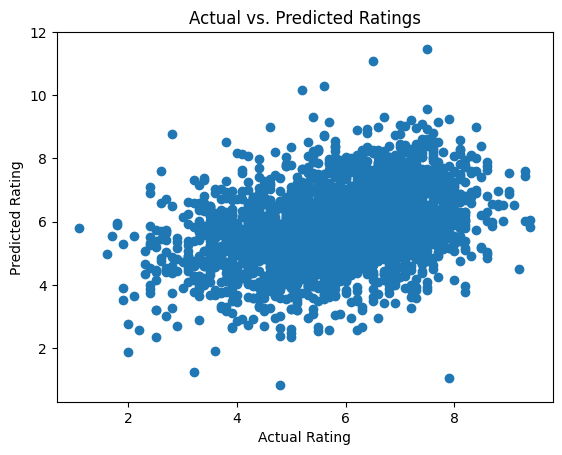

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()

In [40]:
import joblib
joblib.dump(model, 'movie_rating_model.pkl')


['movie_rating_model.pkl']